# PLA with error plots

## Generate dataset

[0.22844806 0.60319204 0.13579162]
0.6591422584638422


2000

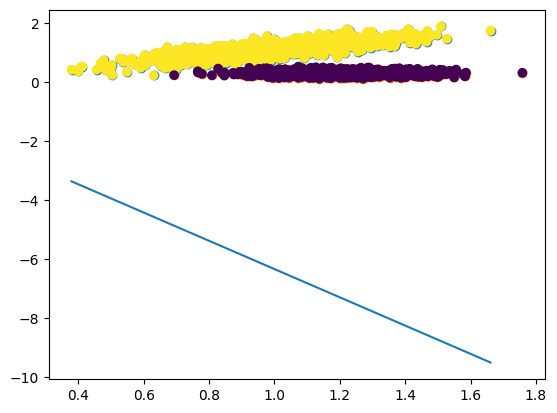

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(22)

# generate N points per class
N = 1000

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1
# generate labels
Y1 = np.ones(N)

X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3 #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)
# generate labels
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generate w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
#w = w / np.linalg.norm(w)

print(w)
print(np.linalg.norm(w))

plt.plot([np.min(X1_1), np.max(X1_1)], [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])

# generate coordinate X0
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)

y.shape[0]

In [2]:
def error_w(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2
    return error

error_w(X, y, w)

1998.8480052413352

## Training script

Before entering the loop to train the _Perceptron_ network we set the learning rate $\eta = 1$, and then we initialize the variables <tt>epochs</tt> - which counts the iterations - and <tt>max_epochs</tt> - which is the maximum number of iterations allowed.

Then we initialize the array <tt>total_error</tt> which stores for every epoch the number of errors: this is done in order to plot the amount of errors and see its changes over time.

The most important is in the following line where we define the <tt>total_num_errors</tt> array, which is the number of disclassified points. We stop the cycle when this value is zero, meaning that we found a hyperplane that separates the points. 


In [3]:
# set learning rate 0 < eta < 1
eta = 1e-0

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 100

# track total error per epoch
total_error = np.zeros(max_epochs)

# set checkpoint
total_num_errors = np.zeros(max_epochs)

We start iterating until we reach the maximum number of epochs, we initialize the error counter <tt>num_errors</tt> and we compute the total number of errors.

Then for each element in the dataset, we compute the dot-product and then we check all at once if there are any misclassified points. If so, we correct the weight with the _perceptron learning rule_. The algorithm is pretty much the same as in the other notebooks with the only difference being that we keep track of the total amount of errors.

In [4]:
while (epochs < max_epochs):
    
    # compute number of errors
    num_errors = 0
    
    # comput initial number of errors
    total_error[epochs] = error_w(X, y, w)
        
    for i in range(y.shape[0]):
        #x = X[i, :]
        #y = y[i]
        #print(x, y)
        
        dot_prod = np.dot(X[i, :], w)
        #print(dot_prod * y)
        
        if ((dot_prod * y[i]) < 0):
            w = w + eta * (X[i, :] * y[i])
            num_errors += 1
            #print(num_errors)
    
    total_num_errors[epochs] = num_errors
    
    if (num_errors == 0):
        break
    else:
        epochs += 1

At the end of the training we print the result by plotting the hyperplane computed by the algorithm by displaying the two sets of points and the green line representing the hyperplane, 

# of epochs =  100


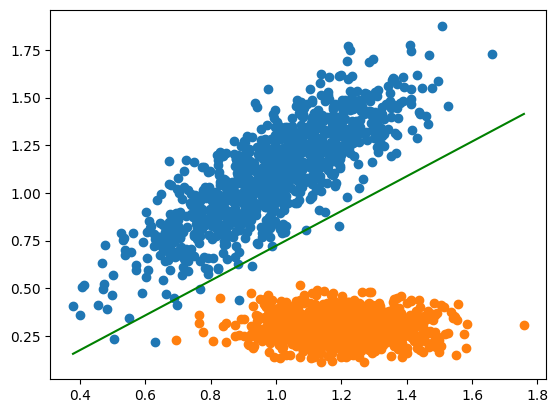

In [5]:
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
print("# of epochs = ", epochs)
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

## Error plots

The left plot represents the amount of error: it has not been used to compute the training, it is just to keep track of the distances between the points and the hyperplane. Noticeably, before epoch 10 there was a situation where the amount of error was very low compared to the end. At the same time, on the right pot, on the epochs before ten, we had two misclassified points among 1000. Then the perceptron kept learning to minimize the number of mistakes to zero and while it was looking for the position the number of errors kept increasing. This is pretty reasonable because to update the updates of perceptron we keep adding. 


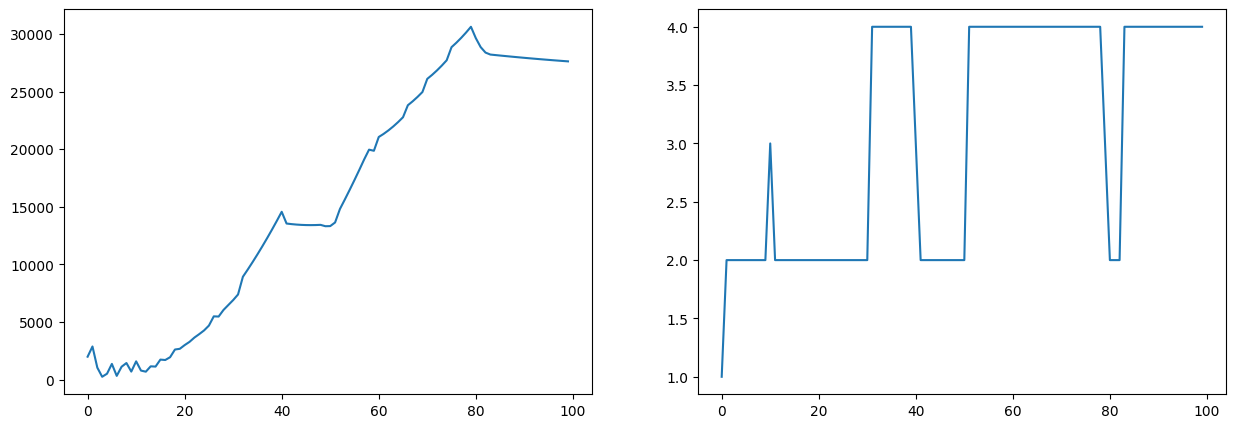

In [6]:
# creates two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey = False)

# the first subplot contains the total number of errors
axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])

# the second one contains the misclassified points
axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])